# Method 1: CV

## Preparation

In [3]:
%run "/Users/joel.gysel/GoogleDrive/Masterarbeit/04_code/jupyter/01_Preparation.ipynb"

Running file completed


In [4]:
%run "/Users/joel.gysel/GoogleDrive/Masterarbeit/04_code/jupyter/_config.ipynb"

Running file completed


In [5]:
pd.set_option('display.max_rows', 50)

## Individual Classifiers

In [17]:
# classifiers_list = [classifiers_naive, classifiers_lr]

In [18]:
results_single = pd.DataFrame()
split  = 1999



for classifiers in classifiers_list:
    
    for classifier in classifiers: 
        print(classifier.__class__.__name__)
    
        for sampler in samplers: 
            if sampler == "none":
                samplersymbol = "No oversampling"
                print(samplersymbol)
            else:
                samplersymbol = str(sampler.__class__.__name__) + str(sampler.sampling_strategy)
                print(samplersymbol)

            # plt.figure(0).clf()

        

            if classifier.__class__.__name__ == "Perceptron":
                keysymbol = " "
            if classifier.__class__.__name__ == "LogisticRegression":
                keysymbol = "C = " + str(classifier.C)
            if classifier.__class__.__name__ == "DecisionTreeClassifier":
                keysymbol = "MD = " + str(classifier.max_depth)
            if classifier.__class__.__name__ == "RandomForestClassifier":
                keysymbol = "Nr. of Trees = " + str(classifier.n_estimators)
            if classifier.__class__.__name__ == "AdaBoostClassifier":
                keysymbol = "Nr. of Estim. = " + str(classifier.n_estimators) + ", LR = " + str(classifier.learning_rate)
            if classifier.__class__.__name__ == "GradientBoostingClassifier":
                keysymbol = "Nr. of Estim. = " + str(classifier.n_estimators) + ", LR = " + str(classifier.learning_rate)
            if classifier.__class__.__name__ == "XGBClassifier":
                keysymbol = "LR = " + str(classifier.learning_rate)
            if classifier.__class__.__name__ == "KNeighborsClassifier":
                keysymbol = "Nr. of Neighb. = " + str(classifier.n_neighbors)
            if classifier.__class__.__name__ == "GaussianNB":
                keysymbol = " " 
            if classifier.__class__.__name__ == "SVC":
                keysymbol = "Gamma =" + str(classifier.gamma) + ", C =" + str(classifier.C)
            print(keysymbol)


            for vars in varlist:
                print(vars)

                group_list     = []
                accuracy_list  = []
                precision_list = []
                recall_list    = []
                f1value_list   = []
                f2value_list   = []                
                ap_list        = []

                
                for group in range(0, 7):
                    
                    # Create sample
                    train_X = pd_data[(pd_data.Year <= split) & (pd_data.wookie != group)][vars]
                    train_y = pd_data[(pd_data.Year <= split) & (pd_data.wookie != group)]["Default"]

                    test_X  = pd_data[(pd_data.Year <= split) & (pd_data.wookie == group)][vars]
                    test_y  = pd_data[(pd_data.Year <= split) & (pd_data.wookie == group)]["Default"]
                    
                    
                    # Make Prediction
                    if classifier.__class__.__name__ == "Perceptron":
                        pred   = [1] * len(test_X)
                        proba  = [1] * len(test_X)
                        
                    else:
                        if sampler == "none":
                            classifier.fit(train_X, train_y)
                        else:
                            X_resampled, y_resampled = sampler.fit_resample(train_X, train_y) 
                            classifier.fit(X_resampled, y_resampled) 
                            
                        # Predictions
                        pred   = classifier.predict(test_X)
                        proba  = classifier.predict_proba(test_X)[:,1]
                        

                    # Evaluate
                    group_list.append(group)
                    accuracy  = accuracy_score(test_y, pred)
                    accuracy_list.append(accuracy)
                    precision = precision_score(test_y, pred)
                    precision_list.append(precision)
                    recall    = recall_score(test_y, pred)
                    recall_list.append(recall)
                    f1value    = fbeta_score(test_y, pred, average='binary', beta=1)
                    f1value_list.append(f1value)
                    f2value    = fbeta_score(test_y, pred, average='binary', beta=2)
                    f2value_list.append(f2value)
                    ap        = metrics.average_precision_score(test_y, proba)
                    ap_list.append(ap)

                    # Curves
                    precision, recall, tresh = metrics.precision_recall_curve(test_y, proba)


                # Plot
                # plt.plot(group_list, fvalue_list, label = '{}, Avg F2 = {}'.format(keysymbol, round(statistics.mean(fvalue_list), 2)))         
                # plt.plot(group_list, ap_list,     label = '{}, Avg AP = {}'.format(keysymbol, round(statistics.mean(ap_list), 2)))         
                # plt.ylim([0.0, 1.05])

                
                # Matrix with results
                newrow  = pd.DataFrame({"Model"        : [classifier],
                                        "Classifier"   : [classifier.__class__.__name__],
                                        "Hyperparam."  : [keysymbol],
                                        "Sampler"      : [samplersymbol],
                                        "Vars"         : [len(vars)],
                                        "Accuracy"     : [statistics.mean(accuracy_list)],
                                        "Precision"    : [statistics.mean(precision_list)],
                                        "Recall"       : [statistics.mean(recall_list)],
                                        "F1"           : [statistics.mean(f1value_list)],
                                        "F1 Var"       : [statistics.variance(f1value_list)],
                                        "F2"           : [statistics.mean(f2value_list)],
                                        "F2 Var"       : [statistics.variance(f2value_list)],
                                        "AP"           : [statistics.mean(ap_list)],
                                        "Maximum"      : [0]})
                results_single = pd.concat([results_single, newrow], ignore_index = True)


    results_single.loc[(results_single["Classifier"] == classifier.__class__.__name__) & 
                       (results_single["F2"] == max(results_single[results_single.Classifier == classifier.__class__.__name__]["F2"])), 
                       "Maximum"] = 1

# Export results to excel
results_single.to_excel(f"05_output/Tables/CV_Single.xlsx")
results_single.to_csv("05_output/CV_Single.csv")

Perceptron
RandomOverSampler1.0
 
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG', 'OPEN']
Logistic

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG', 'OPEN']
DecisionTreeClassifier
RandomOverSampler1.0
MD = 4
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER'

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG', 'OPEN']
DecisionTreeClassifier
RandomOverSampler1.0
MD = 20
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF'

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier
RandomOverSampler1.0
Nr. of Trees = 50
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG', 'OPEN']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier
RandomOverSampler1.0
Nr. of Trees = 100
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG', 'OPEN']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier
RandomOverSampler1.0
Nr. of Trees = 500
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG', 'OPEN']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoostClassifier
RandomOverSampler1.0
Nr. of Estim. = 10, LR = 0.1
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG'

AdaBoostClassifier
RandomOverSampler1.0
Nr. of Estim. = 100, LR = 0.1
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG

GradientBoostingClassifier
RandomOverSampler1.0
Nr. of Estim. = 10, LR = 0.1
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVE

GradientBoostingClassifier
RandomOverSampler1.0
Nr. of Estim. = 1000, LR = 0.1
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'O

['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG', 'OPEN']
KNeighborsClassifier
RandomOverSampler1.0
Nr. of Neighb. = 5
['STDR

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG', 'OPEN']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
RandomOverSampler1.0
Gamma =1, C =1
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG', 'OPEN']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

SVC
RandomOverSampler1.0
Gamma =1, C =100
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG', 'OPEN']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

SVC
RandomOverSampler1.0
Gamma =10, C =0.01
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG', 'OPEN']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

SVC
RandomOverSampler1.0
Gamma =10, C =1
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG', 'OPEN']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

SVC
RandomOverSampler1.0
Gamma =10, C =100
['STDR']
['STDR', 'M2R']
['STDR', 'M2R', 'ResG']
['STDR', 'M2R', 'ResG', 'DSER']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY']
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST', 'OVER', 'XG', 'RGRWT', 'FDIG', 'OPEN']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

In [22]:
results_single.to_csv("05_output/results_single.csv")

In [23]:
results_single_short = results_single[results_single["Maximum"] == 1]
results_single_short = results_single_short.drop(results_single_short.index[1:15])
results_single_short.to_excel(f"05_output/Tables/CV_Single_Short.xlsx")
results_single_short 

,Model,Classifier,Hyperparam.,Sampler,Vars,Accuracy,Precision,Recall,F1,F1 Var,F2,F2 Var,AP,Maximum
0,"Perceptron(alpha=0.0001, class_weight=None, ea...",Perceptron,,RandomOverSampler,1,0.082592,0.082592,1.000000,0.151752,0.001767,0.306018,0.004717,0.082592,1
54,"LogisticRegression(C=0.2, class_weight=None, d...",LogisticRegression,C = 0.2,RandomOverSampler,10,0.722254,0.179849,0.640016,0.279358,0.011276,0.420149,0.022209,0.295391,1
140,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",DecisionTreeClassifier,MD = 4,RandomOverSampler,6,0.754116,0.193088,0.625768,0.293096,0.005169,0.428380,0.008856,0.223446,1
279,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",RandomForestClassifier,Nr. of Trees = 10,RandomOverSampler,10,0.918385,0.555442,0.187169,0.265384,0.028976,0.211857,0.019836,0.358339,1
504,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",AdaBoostClassifier,"Nr. of Estim. = 100, LR = 1.0",RandomOverSampler,10,0.888139,0.388776,0.548073,0.451267,0.018675,0.503199,0.016262,0.529133,1
714,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",GradientBoostingClassifier,"Nr. of Estim. = 1000, LR = 0.1",RandomOverSampler,10,0.952720,0.883766,0.519831,0.643841,0.015727,0.562220,0.017800,0.681935,1
790,"XGBClassifier(base_score=0.5, booster='gbtree'...",XGBClassifier,LR = 0.1,RandomOverSampler,11,0.892023,0.396681,0.603087,0.475466,0.018208,0.543043,0.017912,0.530470,1
849,"KNeighborsClassifier(algorithm='auto', leaf_si...",KNeighborsClassifier,Nr. of Neighb. = 5,RandomOverSampler,10,0.882018,0.377855,0.628177,0.461836,0.024457,0.542891,0.026525,0.386634,1
898,"GaussianNB(priors=None, var_smoothing=1e-09)",GaussianNB,,RandomOverSampler,14,0.660525,0.163348,0.632095,0.250510,0.005365,0.380558,0.005230,0.250540,1
924,"SVC(C=1, break_ties=False, cache_size=200, cla...",SVC,"Gamma =0.1, C =1",RandomOverSampler,10,0.818689,0.243564,0.574013,0.341126,0.011136,0.450167,0.016695,0.322351,1


# Oversampling

In [24]:
samplers = ["none", ros1, ros2, ros3, ros4, ros5,
            "none", smote1, smote2, smote3, smote4, smote5, 
            "none", adasyn1, adasyn2, adasyn3, adasyn4, adasyn5]

# samplers = ["none"]

In [25]:
classifiers_list = ["Perceptron", "LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier", 
                    "AdaBoostClassifier", "GradientBoostingClassifier", "XGBClassifier", "KNeighborsClassifier", 
                    "GaussianNB", "SVC"]

In [32]:
split  = 1999
results = pd.DataFrame()

for classifiers_str in classifiers_list:
    
    model = results_single_short.loc[results_single_short["Classifier"] == classifiers_str]["Model"].item()
    classifiers = [model]
    
    
    for classifier in classifiers:
        print(classifier.__class__.__name__)
        varnumber = results_single_short.loc[results_single_short["Classifier"] == classifier.__class__.__name__]["Vars"].item()
        print(f"Nr. of Vars = {varnumber}")
        exec("%s = [%s]" % ("varlist", f"varlist{varnumber}"))

        
        for sampler in samplers: 
            if sampler == "none":
                samplersymbol = "No oversampling"
                print(samplersymbol)
            else:
                samplersymbol = str(sampler.__class__.__name__) + str(sampler.sampling_strategy)
                print(samplersymbol)

            # plt.figure(0).clf()
        

            if classifier.__class__.__name__ == "Perceptron":
                keysymbol = " "
            if classifier.__class__.__name__ == "LogisticRegression":
                keysymbol = "C = " + str(classifier.C)
            if classifier.__class__.__name__ == "DecisionTreeClassifier":
                keysymbol = "MD = " + str(classifier.max_depth)
            if classifier.__class__.__name__ == "RandomForestClassifier":
                keysymbol = "Nr. of Trees = " + str(classifier.n_estimators)
            if classifier.__class__.__name__ == "AdaBoostClassifier":
                keysymbol = "Nr. of Estim. = " + str(classifier.n_estimators) + ", LR = " + str(classifier.learning_rate)
            if classifier.__class__.__name__ == "GradientBoostingClassifier":
                keysymbol = "Nr. of Estim. = " + str(classifier.n_estimators) + ", LR = " + str(classifier.learning_rate)
            if classifier.__class__.__name__ == "XGBClassifier":
                keysymbol = "LR = " + str(classifier.learning_rate)
            if classifier.__class__.__name__ == "KNeighborsClassifier":
                keysymbol = "Nr. of Neighb. = " + str(classifier.n_neighbors)
            if classifier.__class__.__name__ == "GaussianNB":
                keysymbol = " "
            if classifier.__class__.__name__ == "SVC":
                keysymbol = "Gamma =" + str(classifier.gamma) + ", C =" + str(classifier.C)
            print(keysymbol)



            for vars in varlist:
                print(vars)

                group_list     = []
                accuracy_list  = []
                precision_list = []
                recall_list    = []
                f1value_list   = []
                f2value_list   = []
                ap_list        = []


                for group in range(0, 7):
                    
                    # Create sample
                    train_X = pd_data[(pd_data.Year <= split) & (pd_data.wookie != group)][vars]
                    train_y = pd_data[(pd_data.Year <= split) & (pd_data.wookie != group)]["Default"]

                    test_X  = pd_data[(pd_data.Year <= split) & (pd_data.wookie == group)][vars]
                    test_y  = pd_data[(pd_data.Year <= split) & (pd_data.wookie == group)]["Default"]
                    
                    
                    # Make Prediction
                    if classifier.__class__.__name__ == "Perceptron":
                        pred   = [1] * len(test_X)
                        proba  = [1] * len(test_X)
                        
                    else:
                        if sampler == "none":
                            classifier.fit(train_X, train_y)
                        else:
                            X_resampled, y_resampled = sampler.fit_resample(train_X, train_y) 
                            classifier.fit(X_resampled, y_resampled) 
                            
                        # Predictions
                        pred   = classifier.predict(test_X)
                        proba  = classifier.predict_proba(test_X)[:,1]
                        

                    # Evaluate
                    group_list.append(group)
                    accuracy  = accuracy_score(test_y, pred)
                    accuracy_list.append(accuracy)
                    precision = precision_score(test_y, pred)
                    precision_list.append(precision)
                    recall    = recall_score(test_y, pred)
                    recall_list.append(recall)
                    f1value    = fbeta_score(test_y, pred, average='binary', beta=1)
                    f1value_list.append(f1value)
                    f2value    = fbeta_score(test_y, pred, average='binary', beta=2)
                    f2value_list.append(f2value)
                    ap        = metrics.average_precision_score(test_y, proba)
                    ap_list.append(ap)

                    # Curves
                    precision, recall, tresh = metrics.precision_recall_curve(test_y, proba)


                # Plot
                # plt.plot(group_list, f2value_list, label = '{}, Avg F2 = {}'.format(keysymbol, round(statistics.mean(fvalue_list), 2)))         
                # plt.plot(group_list, ap_list,     label = '{}, Avg AP = {}'.format(keysymbol, round(statistics.mean(ap_list), 2)))         
                # plt.ylim([0.0, 1.05])

                # Matrix with results
                newrow  = pd.DataFrame({"Model"        : [classifier],
                                        "Classifier"   : [classifier.__class__.__name__],
                                        "Hyperparam."  : [keysymbol],
                                        "Sampler"      : [samplersymbol],
                                        "Vars"         : [len(vars)],
                                        "Accuracy"     : [statistics.mean(accuracy_list)],
                                        "Precision"    : [statistics.mean(precision_list)],
                                        "Recall"       : [statistics.mean(recall_list)],
                                        "F1"           : [statistics.mean(f1value_list)],
                                        "F1 Var"       : [statistics.variance(f1value_list)],
                                        "F2"           : [statistics.mean(f2value_list)],
                                        "F2 Var"       : [statistics.variance(f2value_list)],
                                        "AP"           : [statistics.mean(ap_list)],
                                        "Maximum"      : [0]})
                results = pd.concat([results, newrow], ignore_index = True)


    results.loc[(results["Classifier"] == classifier.__class__.__name__) & 
                (results["F2"] == max(results[results.Classifier == classifier.__class__.__name__]["F2"])), 
                "Maximum"] = 1

# Export results to excel
results.to_excel(f"05_output/Tables/CV_Oversampling.xlsx")


Perceptron
Nr. of Vars = 1
No oversampling
 
['STDR']
RandomOverSampler0.2
 
['STDR']
RandomOverSampler0.4
 
['STDR']
RandomOverSampler0.6
 
['STDR']
RandomOverSampler0.8
 
['STDR']
RandomOverSampler1.0
 
['STDR']
No oversampling
 
['STDR']
SMOTE0.2
 
['STDR']
SMOTE0.4
 
['STDR']
SMOTE0.6
 
['STDR']
SMOTE0.8
 
['STDR']
SMOTE1.0
 
['STDR']
No oversampling
 
['STDR']
ADASYN0.2
 
['STDR']
ADASYN0.4
 
['STDR']
ADASYN0.6
 
['STDR']
ADASYN0.8
 
['STDR']
ADASYN1.0
 
['STDR']
LogisticRegression
Nr. of Vars = 10
No oversampling
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomOverSampler0.2
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler0.4
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler0.6
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler0.8
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler1.0
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
No oversampling
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SMOTE0.2
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
SMOTE0.4
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
SMOTE0.6
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
SMOTE0.8
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
SMOTE1.0
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
No oversampling
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ADASYN0.2
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN0.4
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN0.6
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN0.8
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN1.0
C = 0.2
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
DecisionTreeClassifier
Nr. of Vars = 6
No oversampling
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomOverSampler0.2
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
RandomOverSampler0.4
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
RandomOverSampler0.6
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
RandomOverSampler0.8
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
RandomOverSampler1.0
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
No oversampling
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
SMOTE0.2
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
SMOTE0.4
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SMOTE0.6
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
SMOTE0.8
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
SMOTE1.0
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
No oversampling
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ADASYN0.2
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
ADASYN0.4
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
ADASYN0.6
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
ADASYN0.8
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
ADASYN1.0
MD = 4
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY']
RandomForestClassifier
Nr. of Vars = 10
No oversampling
Nr. of Trees = 10
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler0.2
Nr. of Trees = 10
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler0.4
Nr. of Trees = 10
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler0.6
Nr. of Trees = 10
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler0.8
Nr. of Trees = 10
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler1.0
Nr. of Trees = 10
['STDR

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ADASYN0.4
Nr. of Trees = 10
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN0.6
Nr. of Trees = 10
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN0.8
Nr. of Trees = 10
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN1.0
Nr. of Trees = 10
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
AdaBoostClassifier
Nr. of Vars = 10
No oversampling
Nr. of Estim. = 100, LR = 1.0
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler0.2
Nr. of Estim. = 100, LR = 1.0
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler0.4
Nr. of Estim. = 100, LR = 1.0
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler0.6
Nr. of Estim. = 100, LR = 1.0
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
Rando

SMOTE0.8
Nr. of Neighb. = 5
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
SMOTE1.0
Nr. of Neighb. = 5
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
No oversampling
Nr. of Neighb. = 5
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN0.2
Nr. of Neighb. = 5
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN0.4
Nr. of Neighb. = 5
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN0.6
Nr. of Neighb. = 5
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN0.8
Nr. of Neighb. = 5
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN1.0
Nr. of Neighb. = 5
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
GaussianNB
Nr. of Vars = 14
No oversampling
 
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_to

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

RandomOverSampler0.2
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler0.4
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler0.6
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler0.8
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
RandomOverSampler1.0
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
No oversampling
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

SMOTE0.2
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
SMOTE0.4
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
SMOTE0.6
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
SMOTE0.8
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
SMOTE1.0
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
No oversampling
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

ADASYN0.2
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN0.4
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN0.6
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN0.8
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']
ADASYN1.0
Gamma =0.1, C =1
['STDR', 'M2R', 'ResG', 'DSER', 'CAY', 'FDIY', 'INF', 'SEDY', 'Cont_tot', 'UST']


In [34]:
results_short = results[results["Maximum"] == 1]
results_short = results_short.drop(results_short.index[1:18])
results_short.to_excel(f"05_output/Tables/CV_Oversampling_Short.xlsx")
results_short 

,Model,Classifier,Hyperparam.,Sampler,Vars,Accuracy,Precision,Recall,F1,F1 Var,F2,F2 Var,AP,Maximum
0,"Perceptron(alpha=0.0001, class_weight=None, ea...",Perceptron,,str,1,0.082592,0.082592,1.000000,0.151752,0.001767,0.306018,0.004717,0.082592,1
23,"LogisticRegression(C=0.2, class_weight=None, d...",LogisticRegression,C = 0.2,RandomOverSampler,10,0.722254,0.179849,0.640016,0.279358,0.011276,0.420149,0.022209,0.295391,1
41,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",DecisionTreeClassifier,MD = 4,RandomOverSampler,6,0.754116,0.193088,0.625768,0.293096,0.005169,0.428380,0.008856,0.223446,1
65,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",RandomForestClassifier,Nr. of Trees = 10,SMOTE,10,0.892396,0.343847,0.316756,0.320212,0.016386,0.316018,0.017490,0.296194,1
77,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",AdaBoostClassifier,"Nr. of Estim. = 100, LR = 1.0",RandomOverSampler,10,0.888139,0.388776,0.548073,0.451267,0.018675,0.503199,0.016262,0.529133,1
101,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",GradientBoostingClassifier,"Nr. of Estim. = 1000, LR = 0.1",SMOTE,10,0.963555,0.827503,0.696347,0.744960,0.018976,0.713038,0.024674,0.787428,1
113,"XGBClassifier(base_score=0.5, booster='gbtree'...",XGBClassifier,LR = 0.1,RandomOverSampler,11,0.892023,0.396681,0.603087,0.475466,0.018208,0.543043,0.017912,0.530470,1
130,"KNeighborsClassifier(algorithm='auto', leaf_si...",KNeighborsClassifier,Nr. of Neighb. = 5,RandomOverSampler,10,0.882018,0.377855,0.628177,0.461836,0.024457,0.542891,0.026525,0.382762,1
131,"KNeighborsClassifier(algorithm='auto', leaf_si...",KNeighborsClassifier,Nr. of Neighb. = 5,RandomOverSampler,10,0.882018,0.377855,0.628177,0.461836,0.024457,0.542891,0.026525,0.386634,1
151,"GaussianNB(priors=None, var_smoothing=1e-09)",GaussianNB,,SMOTE,14,0.678670,0.163724,0.622730,0.255028,0.004800,0.388027,0.006323,0.270290,1


In [43]:
i = 1990
varlist  = ["STDR", "M2R", "ResG", "DSER", "CAY", "FDIY", "INF", "SEDY", "Cont_tot", "UST"]
test = pd_data[(pd_data.Year <= i)][varlist]
test

,STDR,M2R,ResG,DSER,CAY,FDIY,INF,SEDY,Cont_tot,UST
0,-0.366942,-0.087465,0.193912,0.158951,0.661688,-0.319111,-0.059062,-0.780469,2,0.822789
16,-0.111353,-0.051933,-0.437599,0.937667,-0.086044,-0.690414,-0.057112,-0.324941,2,0.433029
17,-0.366942,-0.082788,-0.409426,-0.241654,0.638230,-0.475890,-0.053382,-0.780469,1,0.142362
18,-0.366942,-0.083022,0.087461,-0.195520,1.401677,-0.392164,-0.051451,-0.780469,2,-0.125185
19,-0.066923,-0.057293,-0.229019,1.112847,0.140105,-0.690500,-0.051654,-0.231185,1,0.908668
...,...,...,...,...,...,...,...,...,...,...
1980,0.438693,13.648364,-0.255591,0.583199,-0.335923,-0.704501,-0.029431,0.248557,1,1.077123
1981,0.546953,17.806210,-0.286151,-0.111270,-0.676992,-0.699625,-0.049514,0.351543,11,1.731126
1982,0.197685,14.158338,-0.337604,-0.285161,-0.589211,-0.683979,-0.045468,0.044707,10,2.867373
1983,-0.258913,11.069248,-0.226089,-0.329820,0.096444,-0.690068,-0.057932,-0.556643,10,1.992066


# Final prediction

In [6]:
varlist  = ["STDR", "M2R", "ResG", "DSER", "CAY", "FDIY", "INF", "SEDY", "Cont_tot", "UST"]

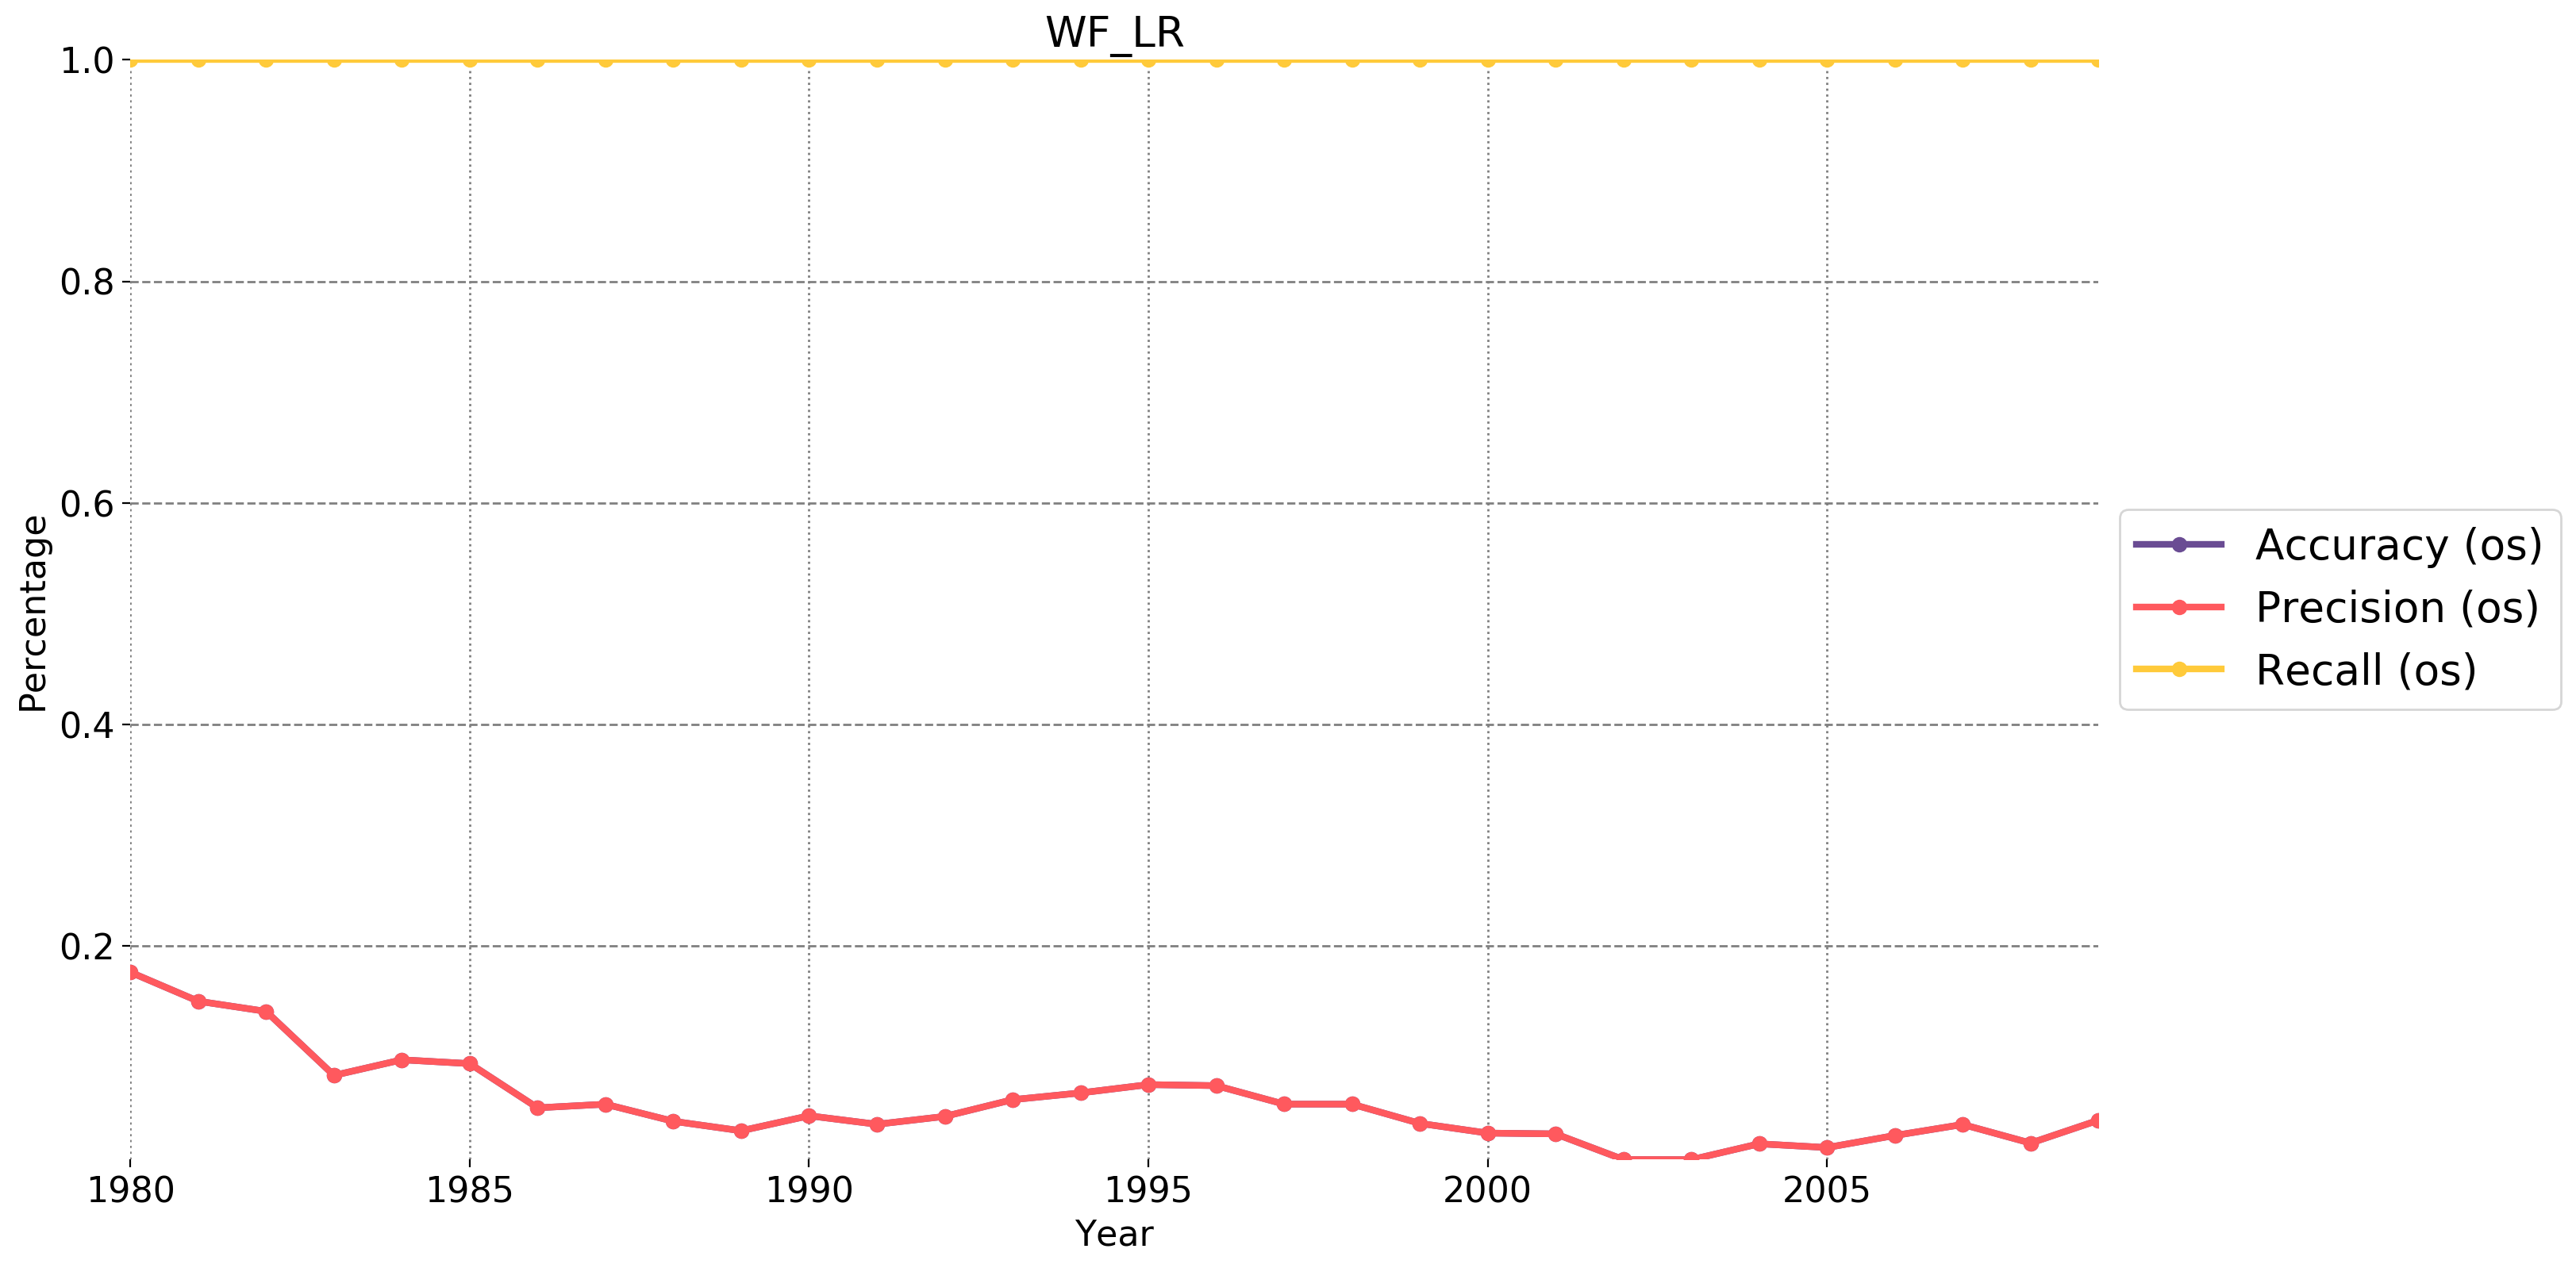

In [46]:
from sklearn.linear_model import Perceptron
varlist = ["STDR", "M2R", "ResG"]
naive   = Perceptron()
ros5    = RandomOverSampler(1.0, random_state=0)

output  = testing(data = pd_data, varlist = varlist, classifier = naive, start=1980, end=2010, past = all, future = 3, 
                title = "WF_LR", sampler = ros5, information = False)


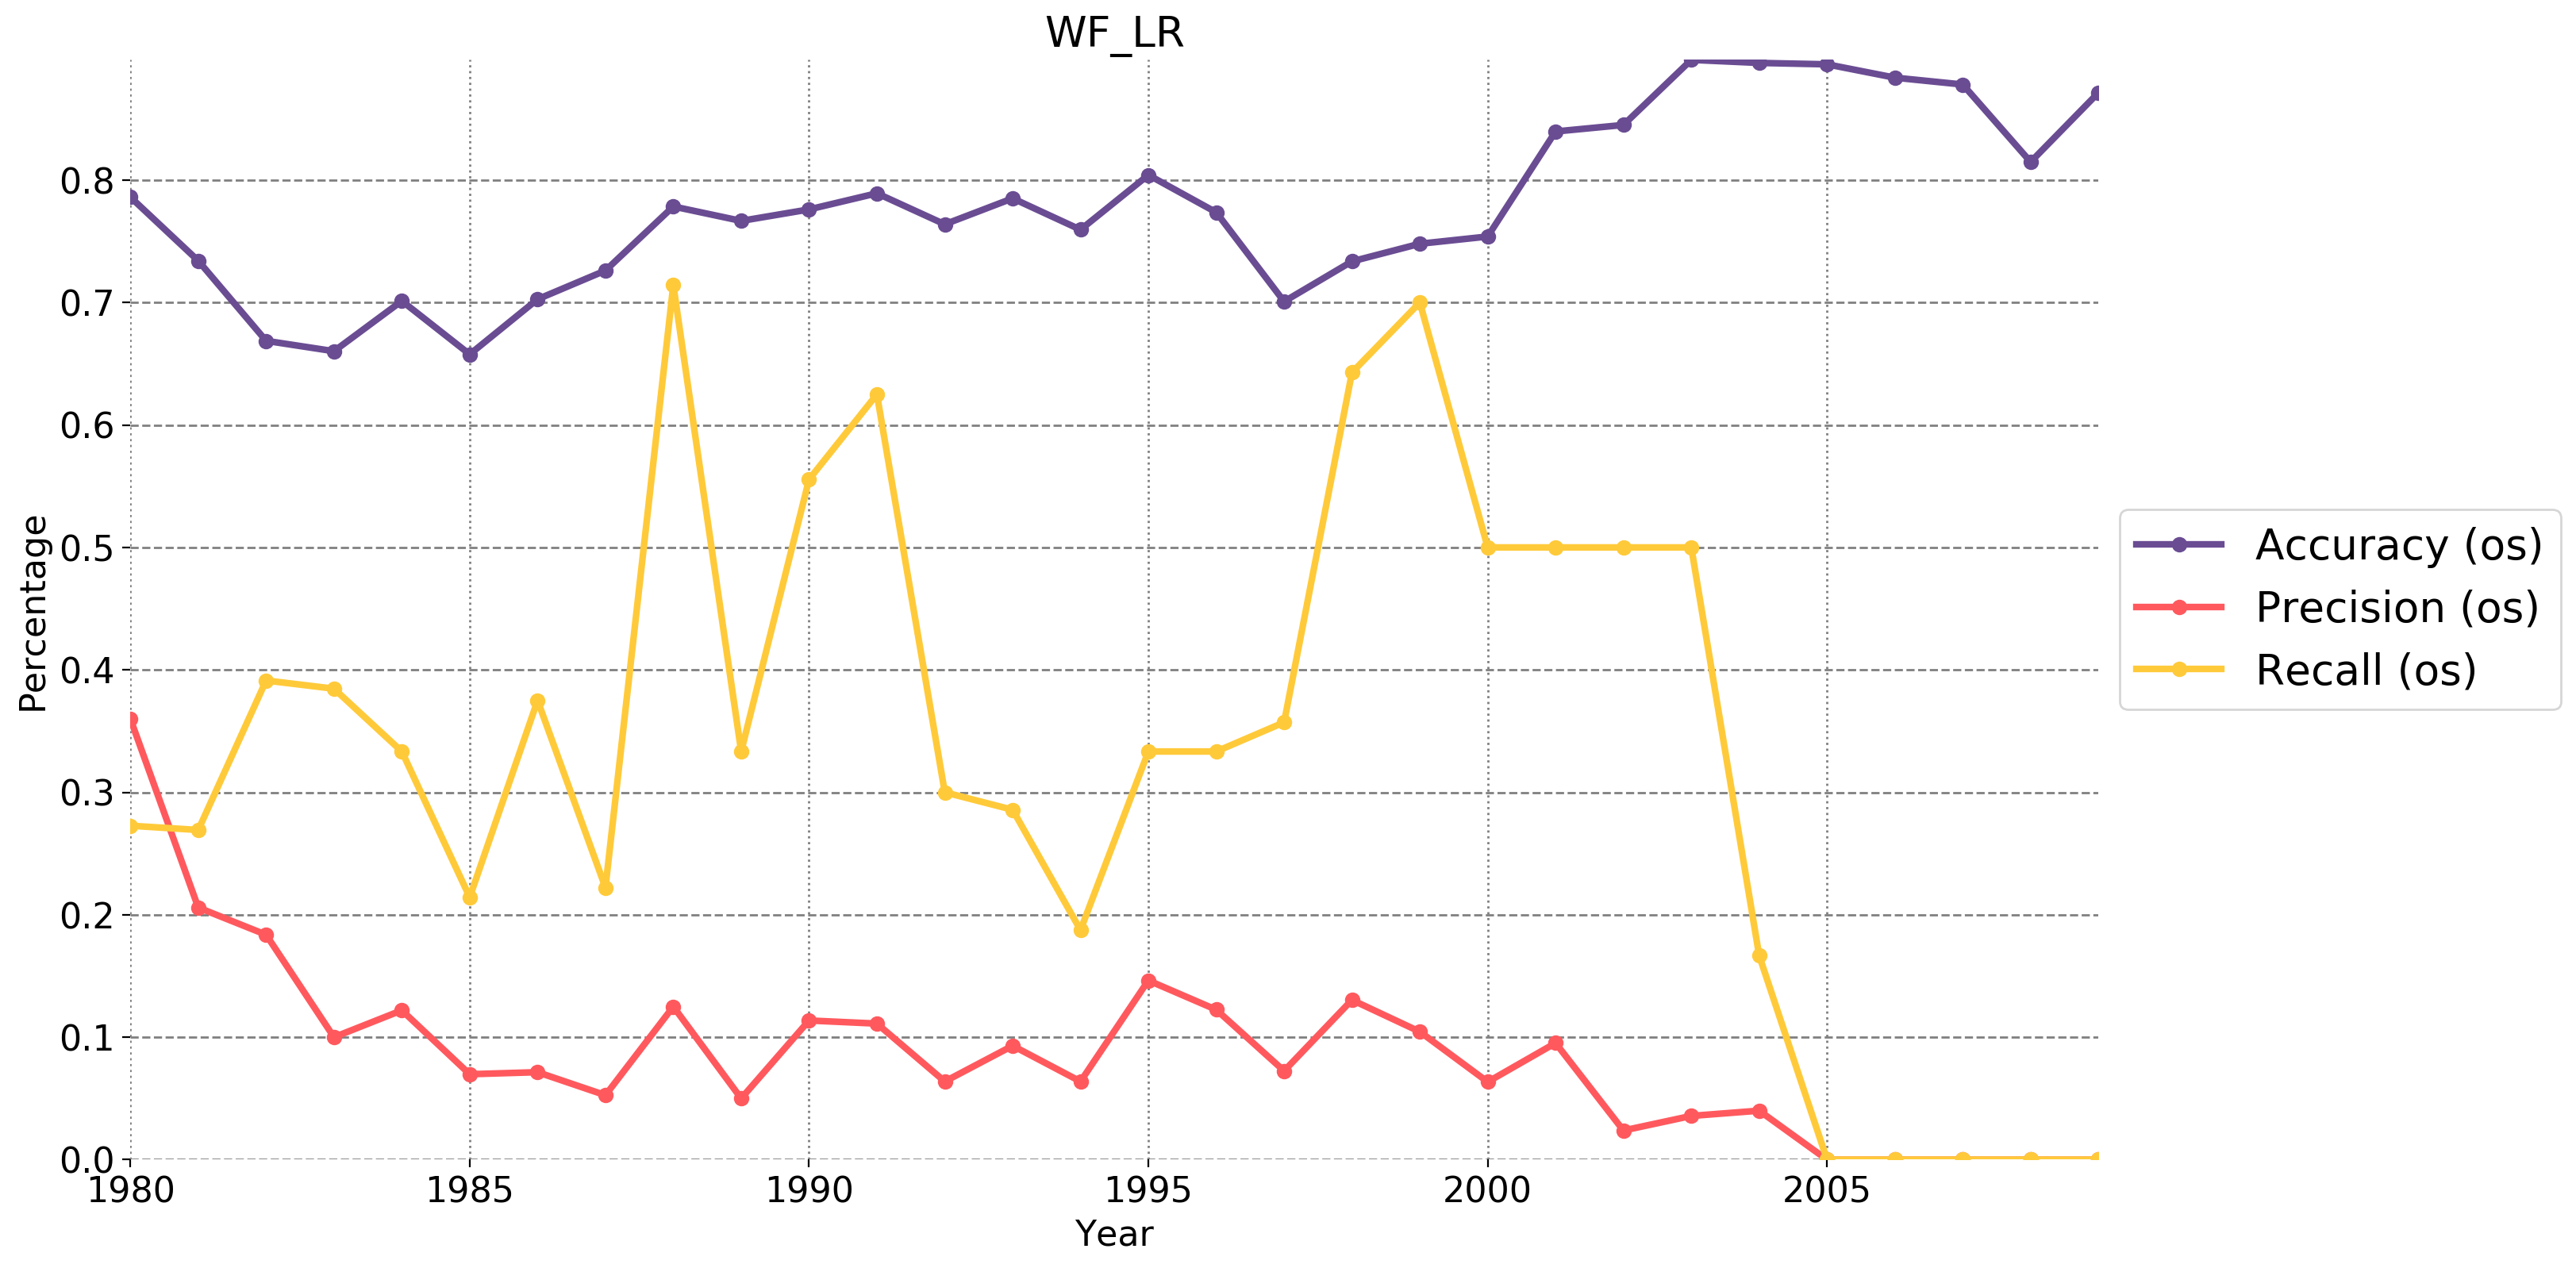

In [48]:
ada100_10 = AdaBoostClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 1)
ros5      = RandomOverSampler(1.0, random_state=0)

output    = testing(data = pd_data, varlist = varlist, classifier = ada100_10, start=1980, end=2010, past = all, future = 3, 
                title = "WF_LR", sampler = ros5, information = False)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

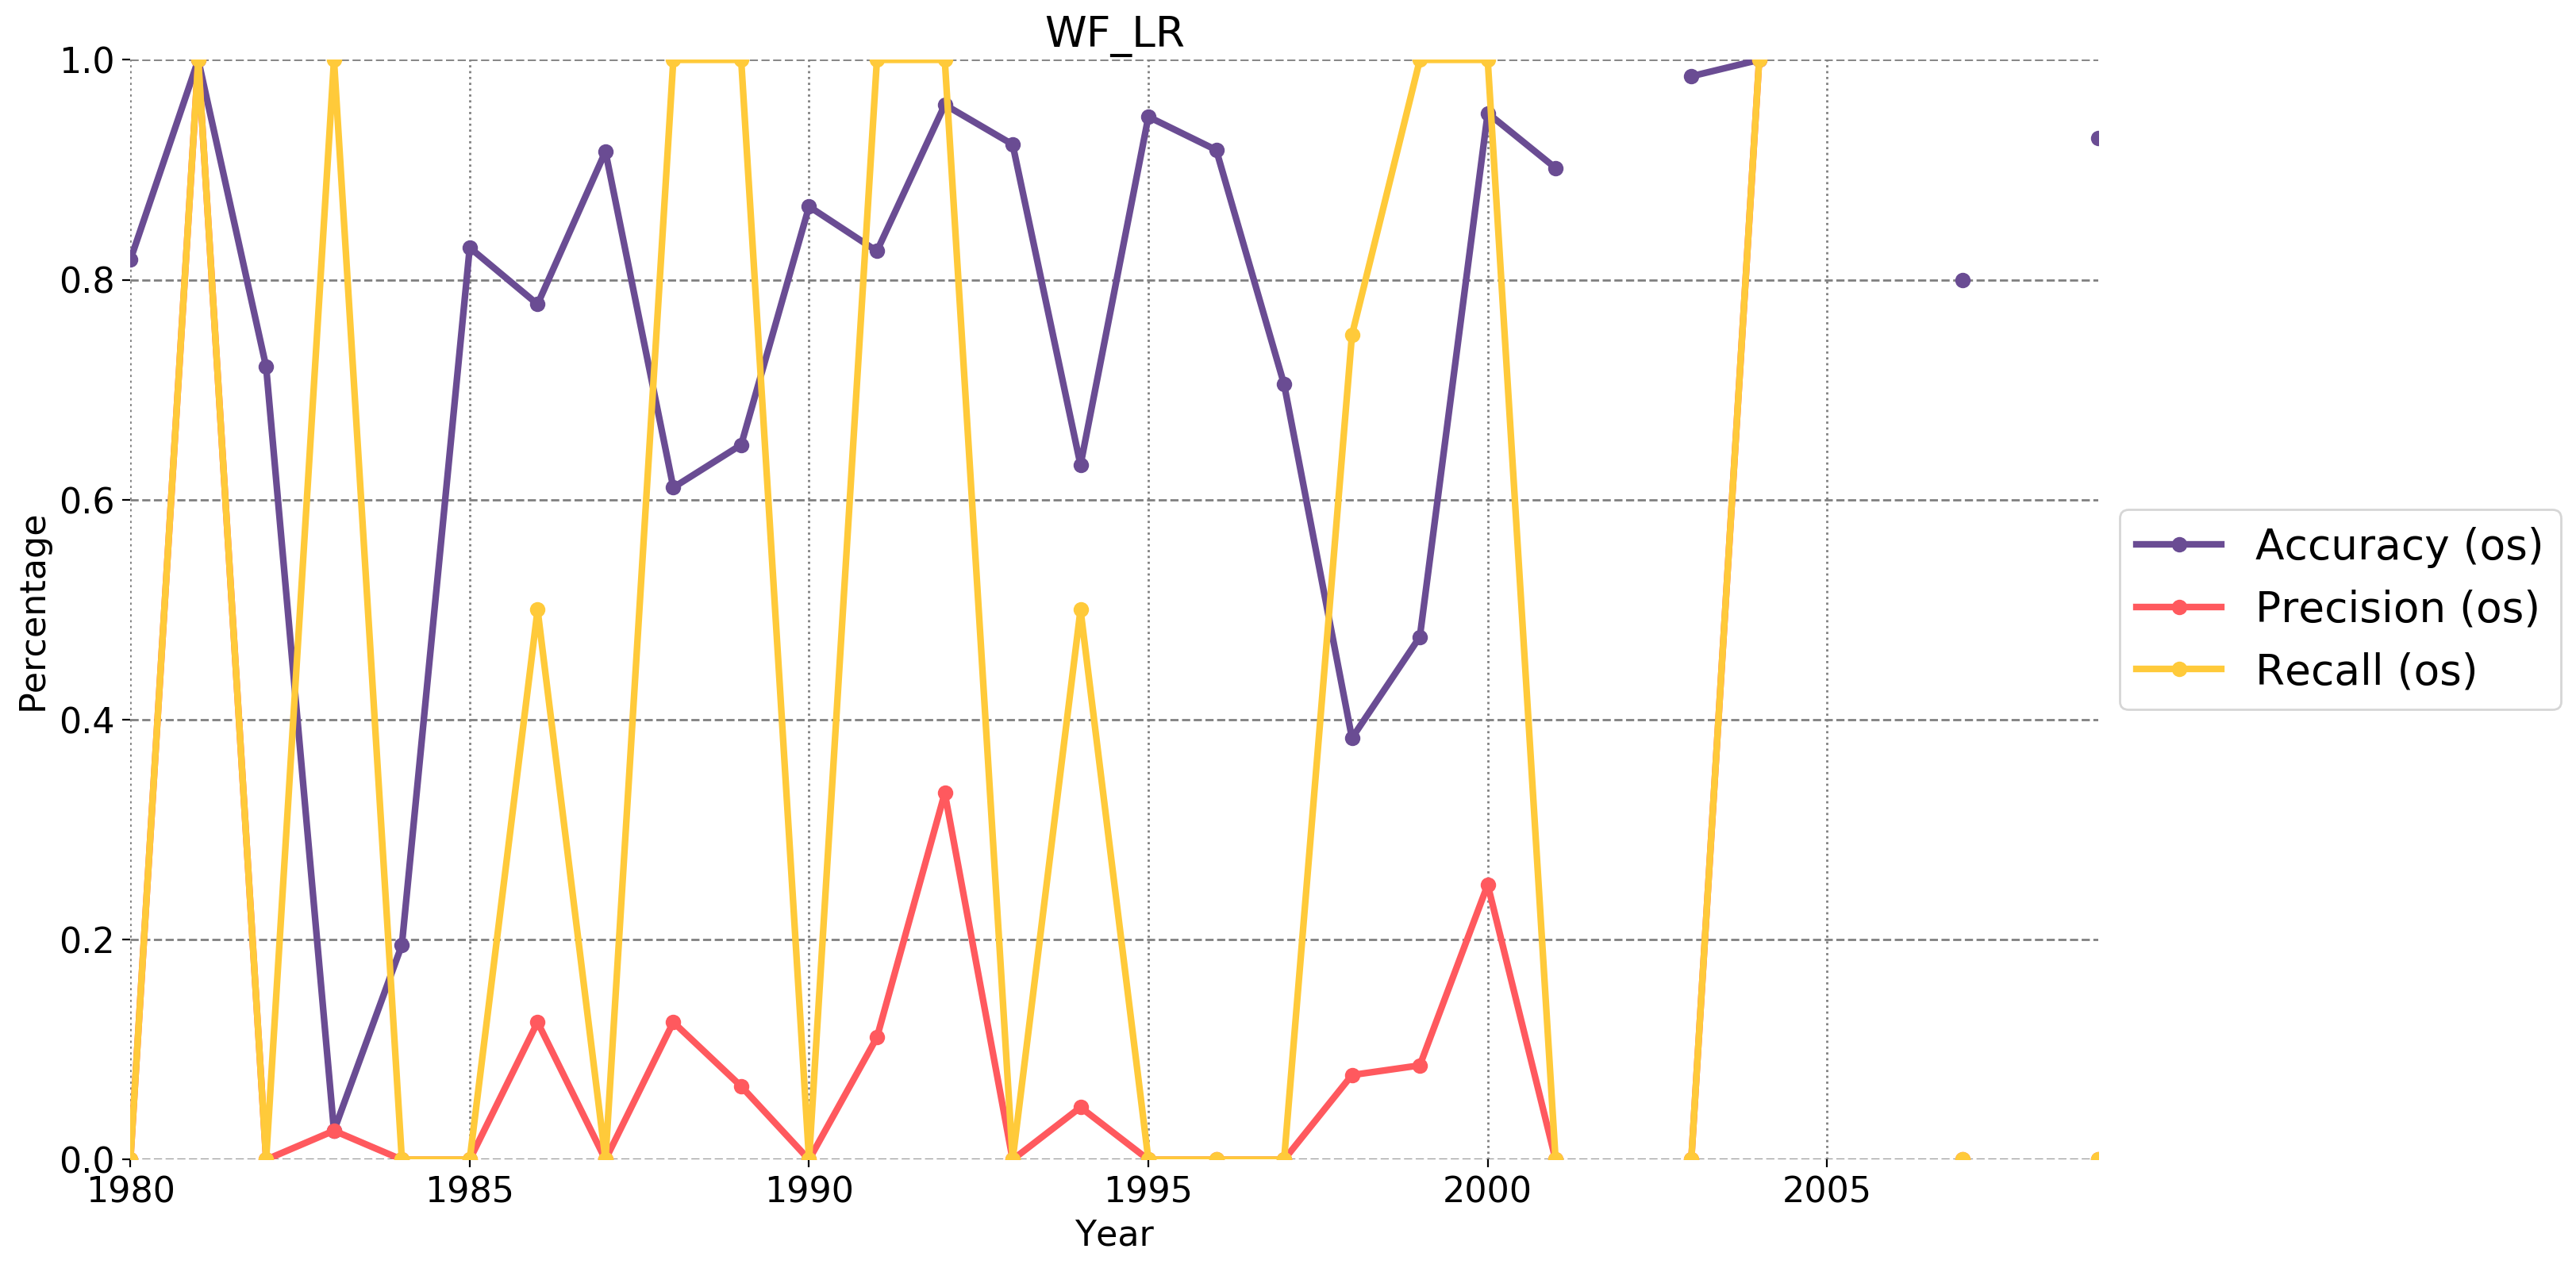

In [7]:
gb1000_01 = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.1, random_state = 1)
smote5    = SMOTE(1.0, random_state=0)

output    = testing(data = pd_data, varlist = varlist, classifier = gb1000_01, start=1980, end=2010, past = all, future = 0, 
                title = "WF_LR", sampler = smote5, information = False)


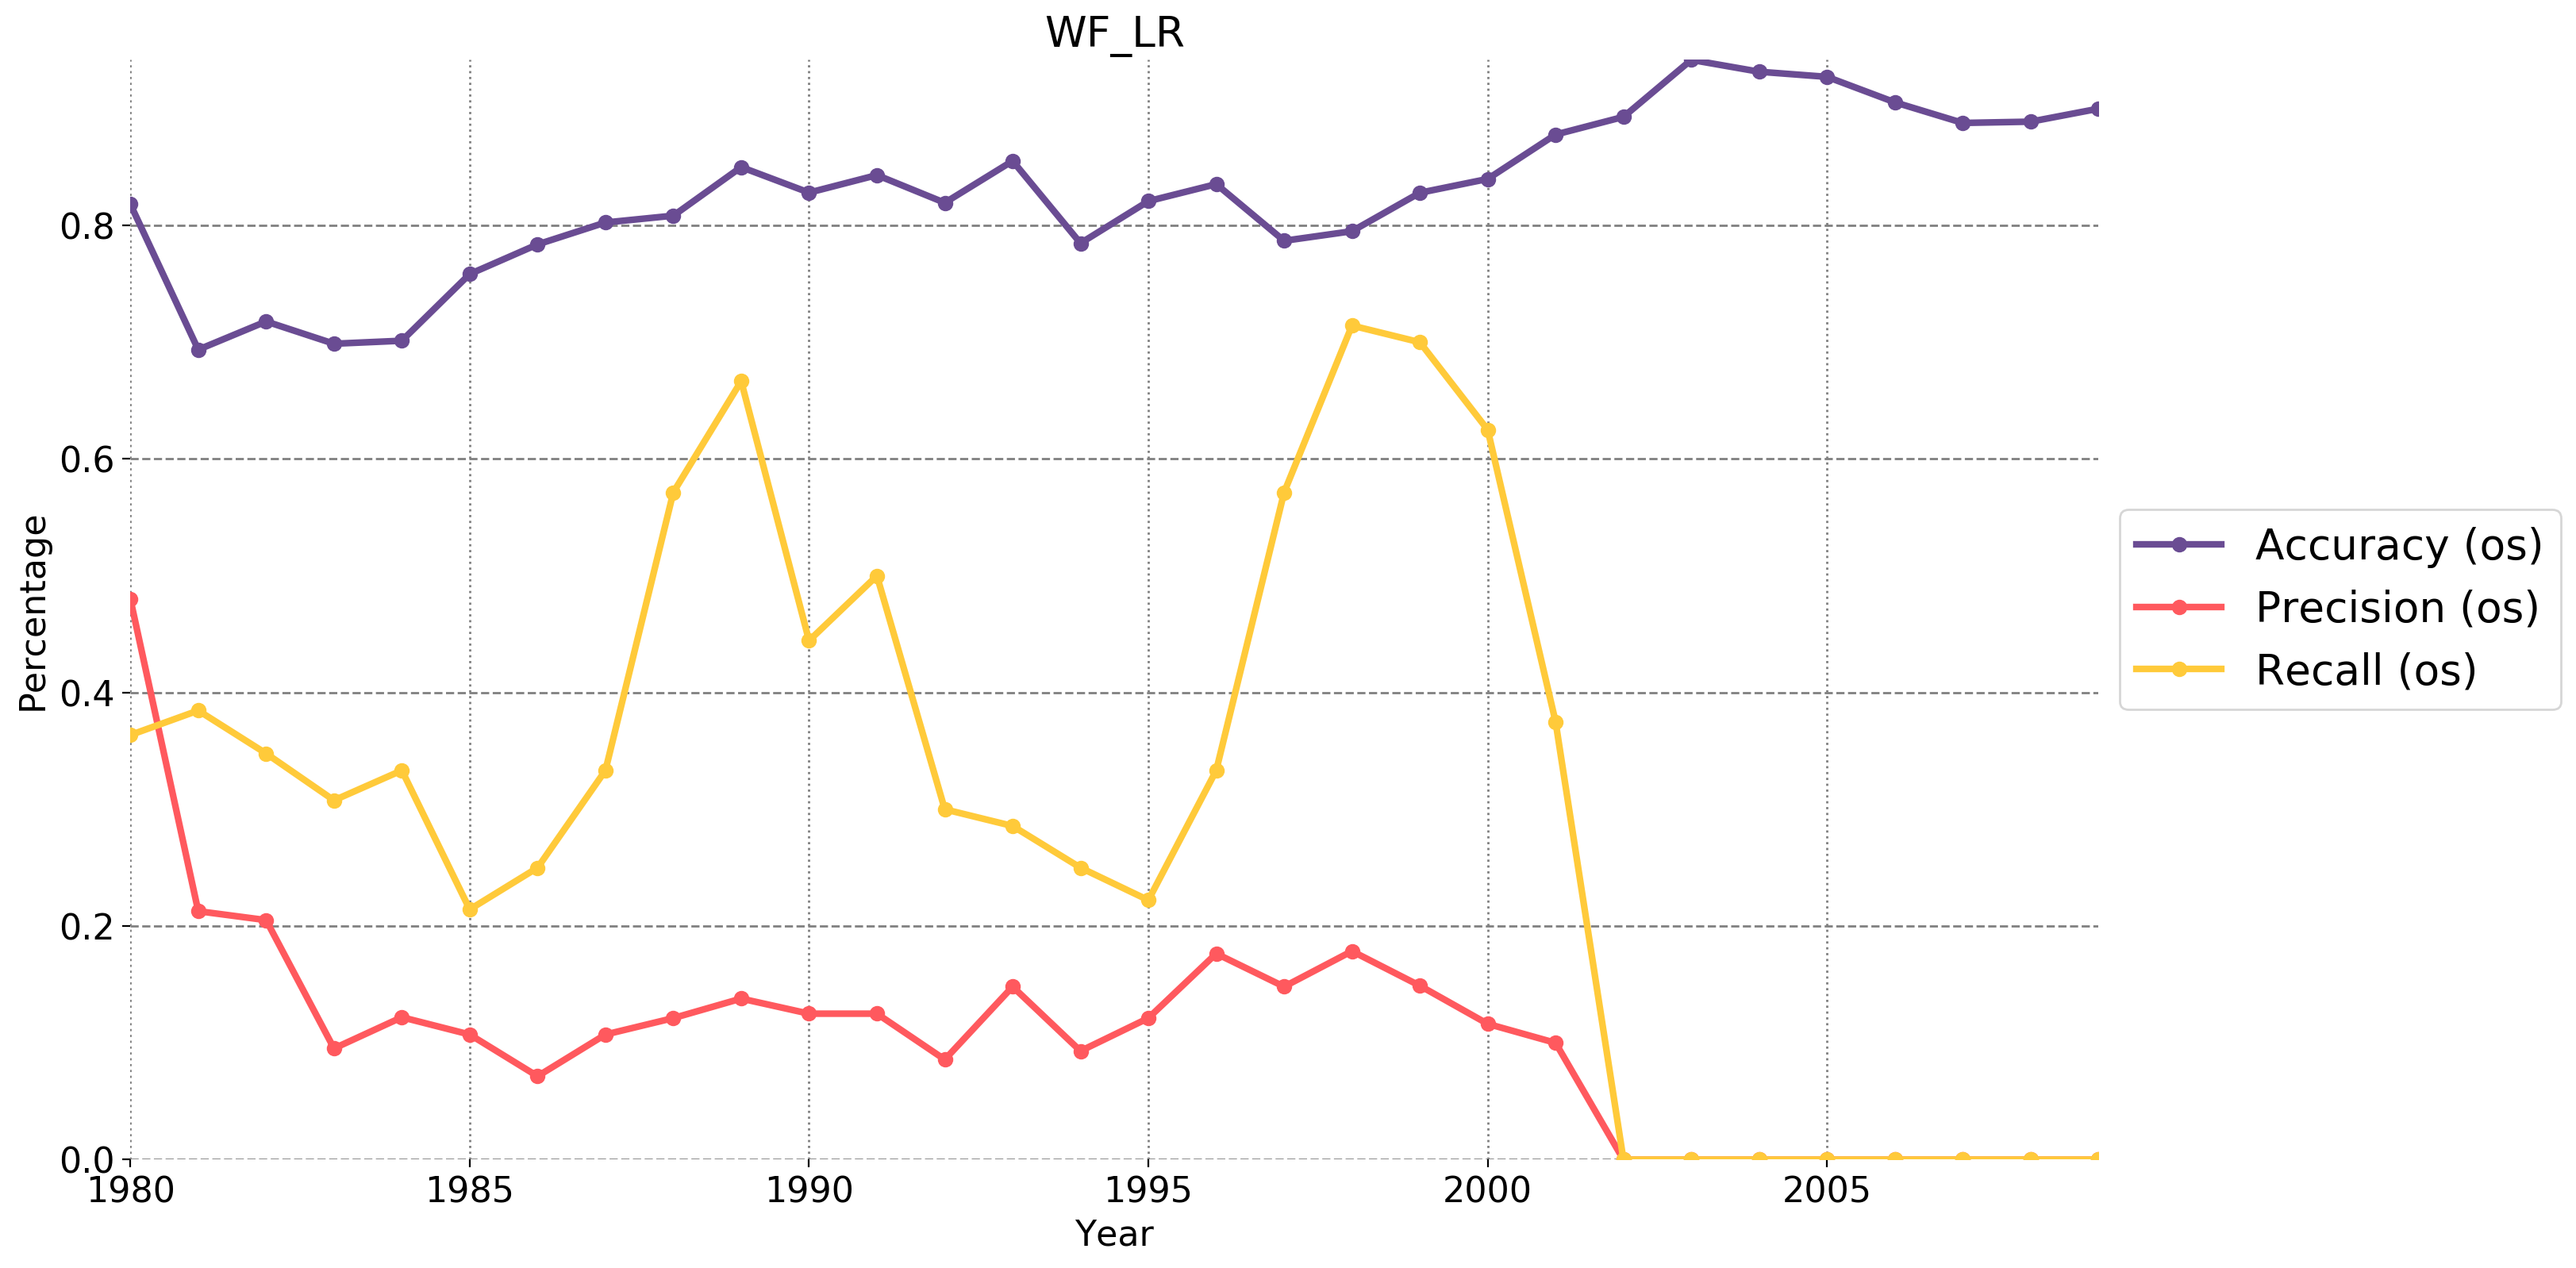

In [50]:
xgb2      = xgb.XGBClassifier(learning_rate=0.1, random_state=1)
ros5      = RandomOverSampler(1.0, random_state=0)

output    = testing(data = pd_data, varlist = varlist, classifier = xgb2, start=1980, end=2010, past = all, future = 3, 
                title = "WF_LR", sampler = ros5, information = False)


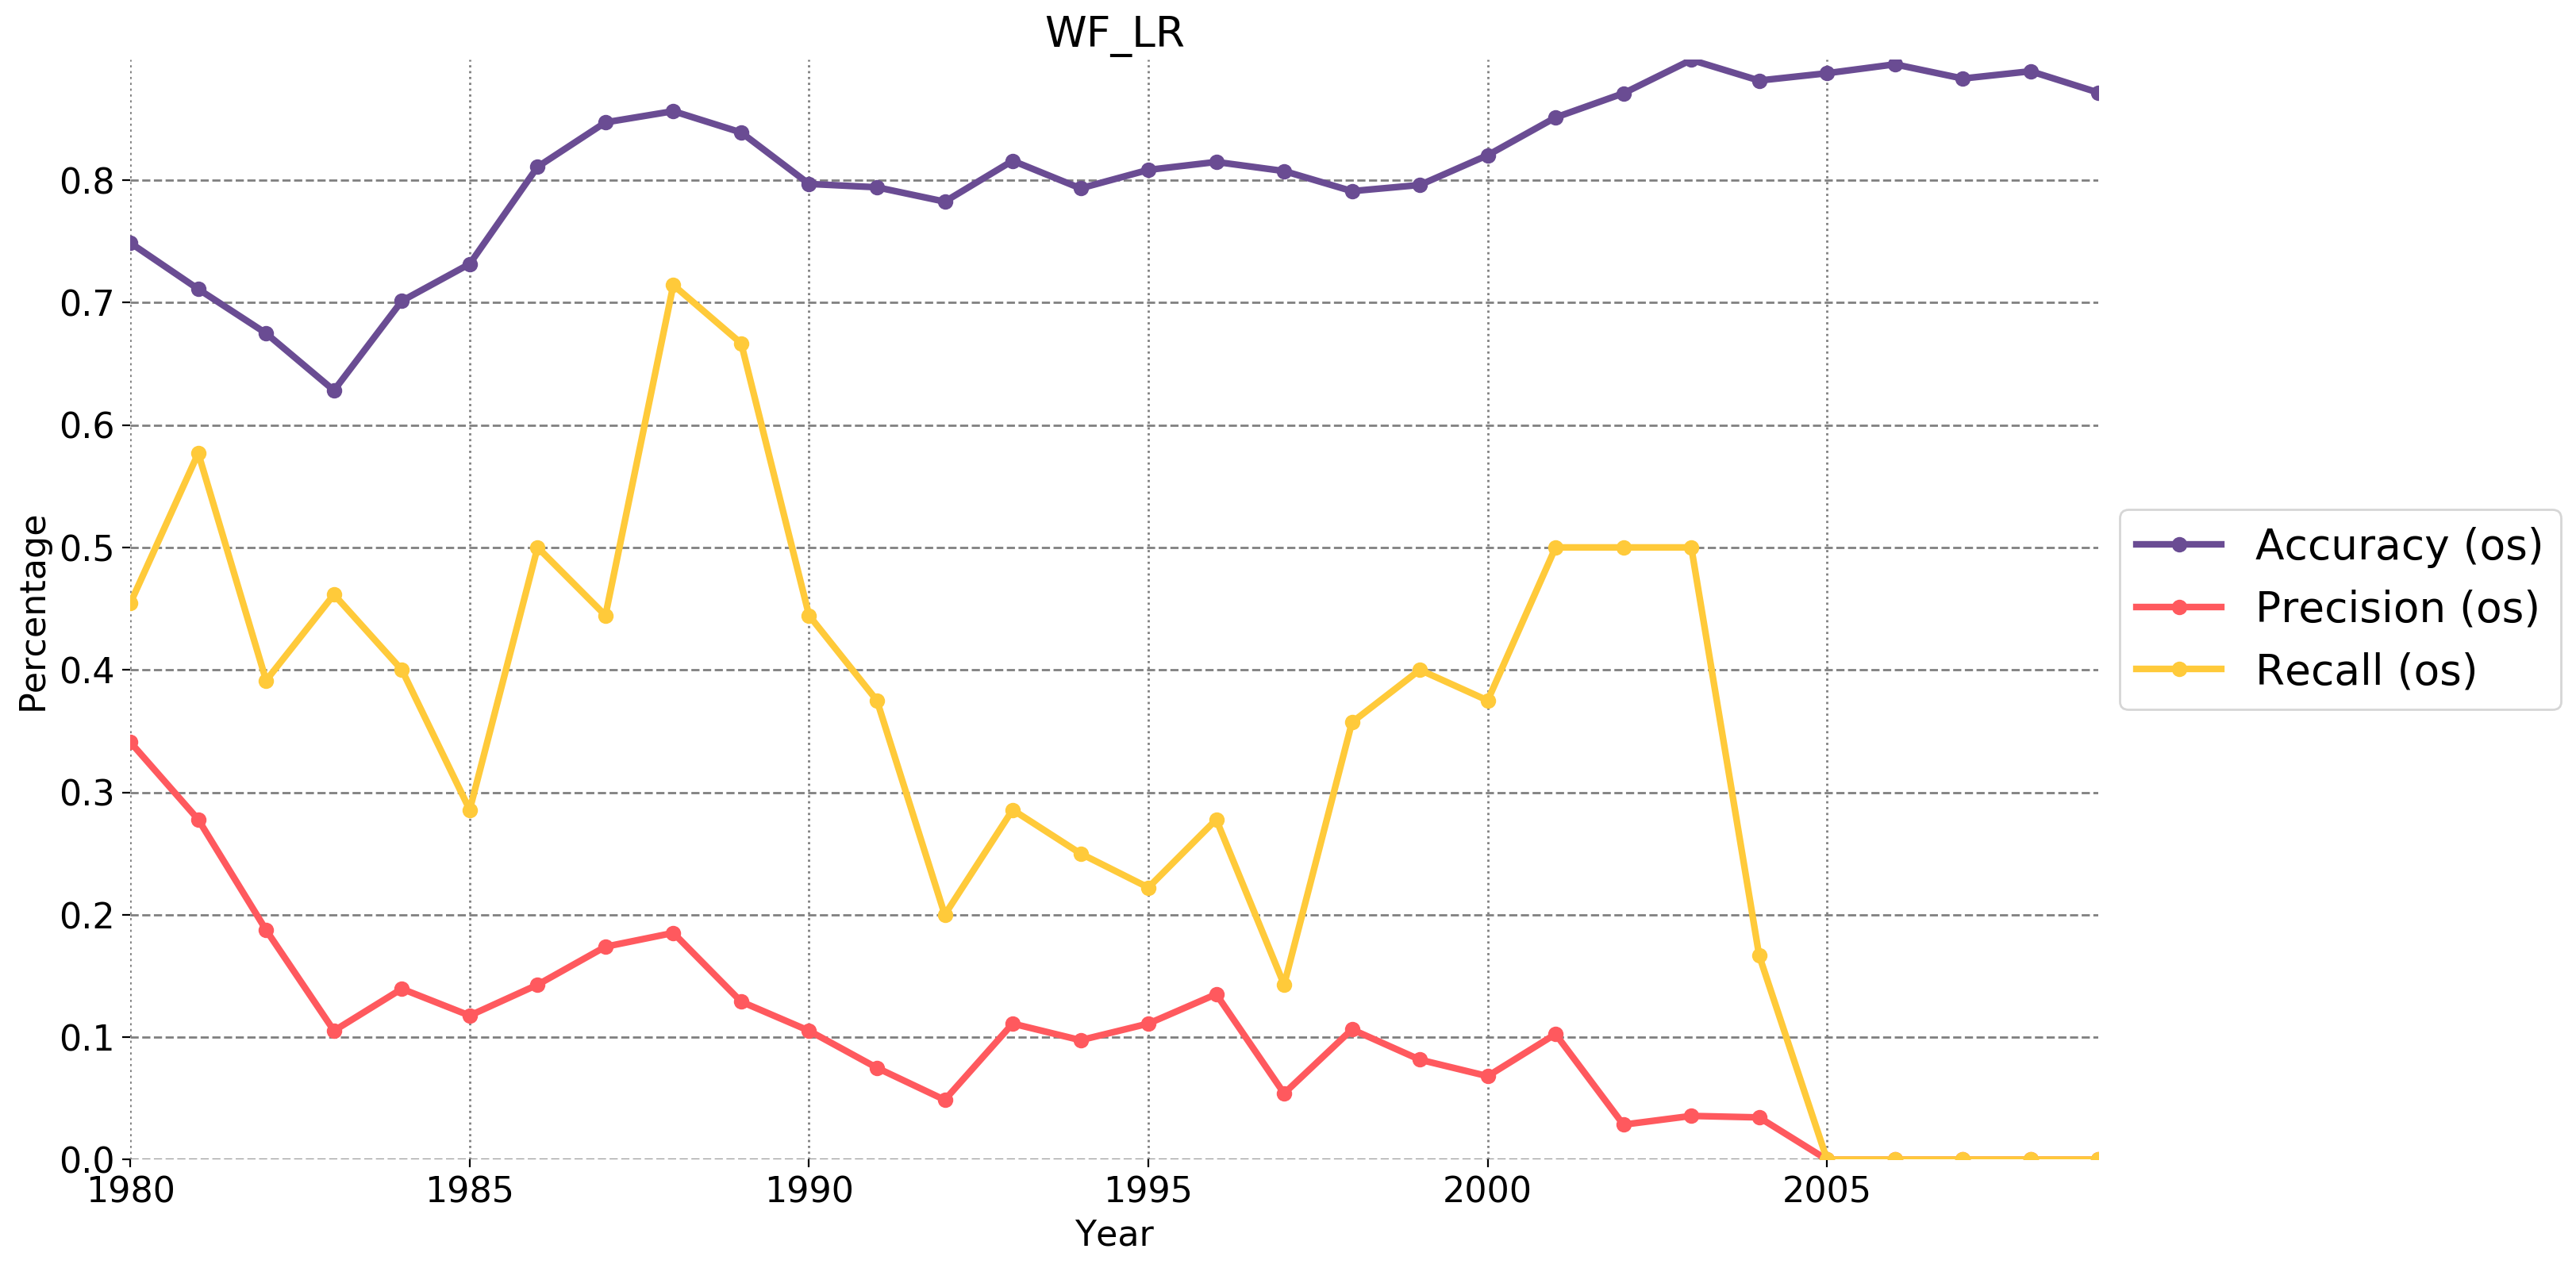

In [51]:
knn5      = KNeighborsClassifier(n_neighbors=5)
ros5      = RandomOverSampler(1.0, random_state=0)

output    = testing(data = pd_data, varlist = varlist, classifier = knn5, start=1980, end=2010, past = all, future = 3, 
                title = "WF_LR", sampler = ros5, information = False)
